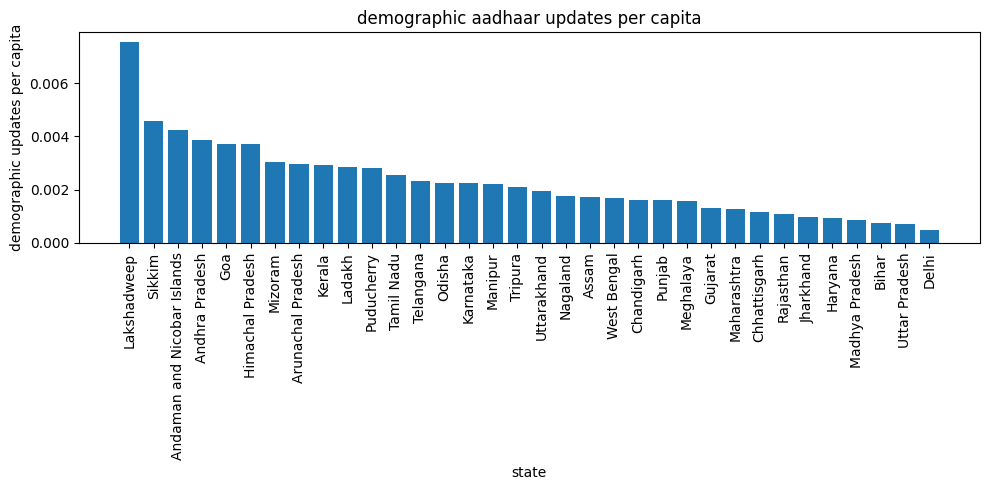

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- demographic updates ----------------

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")

demographic_counts=(
    demographic_df
    .groupby("state")
    .size()
    .rename("demographic_updates")
    .reset_index()
)

# ---------------- population ----------------

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")

population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})

population["population"]=(
    population["population"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

# ---------------- merge ----------------

df=demographic_counts.merge(population,on="state",how="inner")

# demographic updates per capita
df["demographic_updates_per_capita"]=df["demographic_updates"]/df["population"]
df=df.sort_values("demographic_updates_per_capita",ascending=False)

# ---------------- plot ----------------

plt.figure(figsize=(10,5))
plt.bar(df["state"],df["demographic_updates_per_capita"])
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("demographic updates per capita")
plt.title("demographic aadhaar updates per capita")
plt.tight_layout()
plt.show()
